### Import necessary modules

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### load the dataset from the csv file

In [45]:
dataset_columns = ['Max_temp','Min_temp','GDD']
df = pd.read_csv('2.nyeri_temperature_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Max_Temperature_C  2000 non-null   float64
 1   Min_Temperature_C  2000 non-null   float64
 2   GDD                2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB
None


In [46]:
df.columns = dataset_columns
print(df.head())

    Max_temp  Min_temp       GDD
0  26.490142  8.649643  6.569893
1  24.585207  9.710963  6.148085
2  26.943066  8.415160  6.679113
3  29.569090  9.384077  8.476583
4  24.297540  6.212771  4.255155


### Do data cleaning

In [47]:
# remove rows with missing values
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Max_temp  2000 non-null   float64
 1   Min_temp  2000 non-null   float64
 2   GDD       2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB
None


In [48]:
#  display first rows of cleaned data cleaned data
print('This is the first 5 rows of clean data:')
print(df.head())

This is the first 5 rows of clean data:
    Max_temp  Min_temp       GDD
0  26.490142  8.649643  6.569893
1  24.585207  9.710963  6.148085
2  26.943066  8.415160  6.679113
3  29.569090  9.384077  8.476583
4  24.297540  6.212771  4.255155


In [49]:
print('This is the last 5 rows of cleaned data: ')
print(df.tail())

This is the last 5 rows of cleaned data: 
       Max_temp   Min_temp       GDD
1995  28.210451  10.056915  8.133683
1996  24.920436   5.844376  4.382406
1997  22.354376   9.359404  4.856890
1998  24.510799  13.286756  7.898778
1999  22.765292  10.721296  5.743294


### Do some EDA of the data

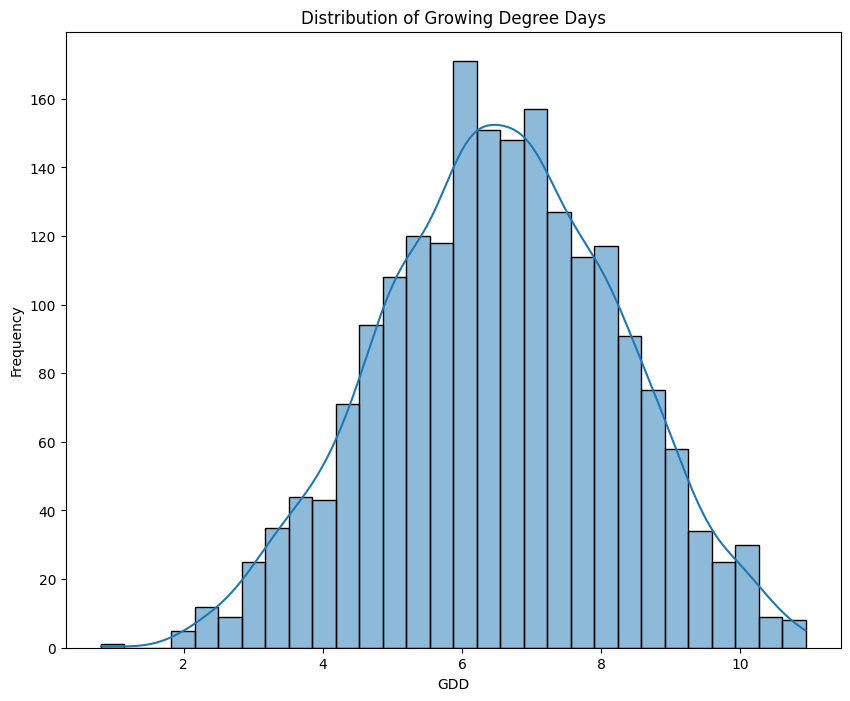

In [50]:
# visualize its distribution
plt.figure(figsize=(10, 8))
sns.histplot(df['GDD'], bins=30, kde=True)
plt.title('Distribution of Growing Degree Days')
plt.xlabel('GDD')
plt.ylabel('Frequency')
plt.show()

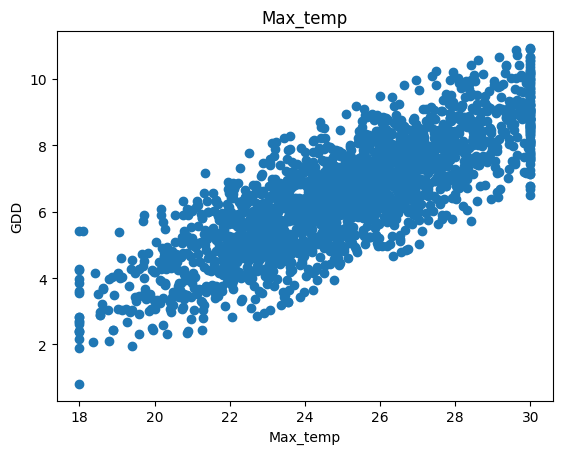

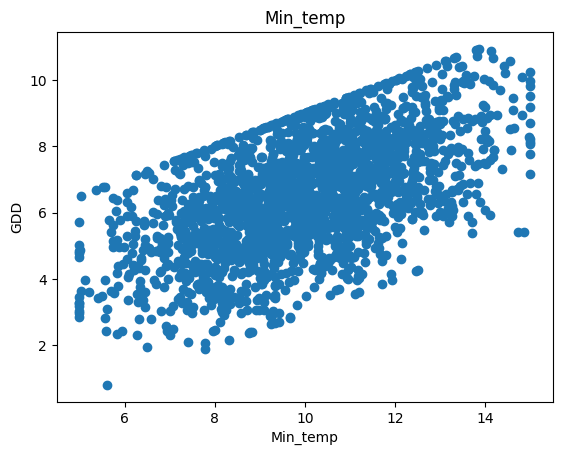

In [51]:
# to see how different variables affect the GDD
for label in df.columns[:-1]: #all columns except the last GDD one
    plt.scatter(df[label], df['GDD']) #see how each label affects the GDD 
    plt.title(label) #title of diagram should be the variable being used
    plt.ylabel('GDD') #y label is GDD
    plt.xlabel(label) #X label is the variable being used
    plt.show()

In [52]:
# first see the correlation matrix without a visual represenation
print(df.corr())

          Max_temp  Min_temp       GDD
Max_temp  1.000000 -0.016376  0.812497
Min_temp -0.016376  1.000000  0.569581
GDD       0.812497  0.569581  1.000000


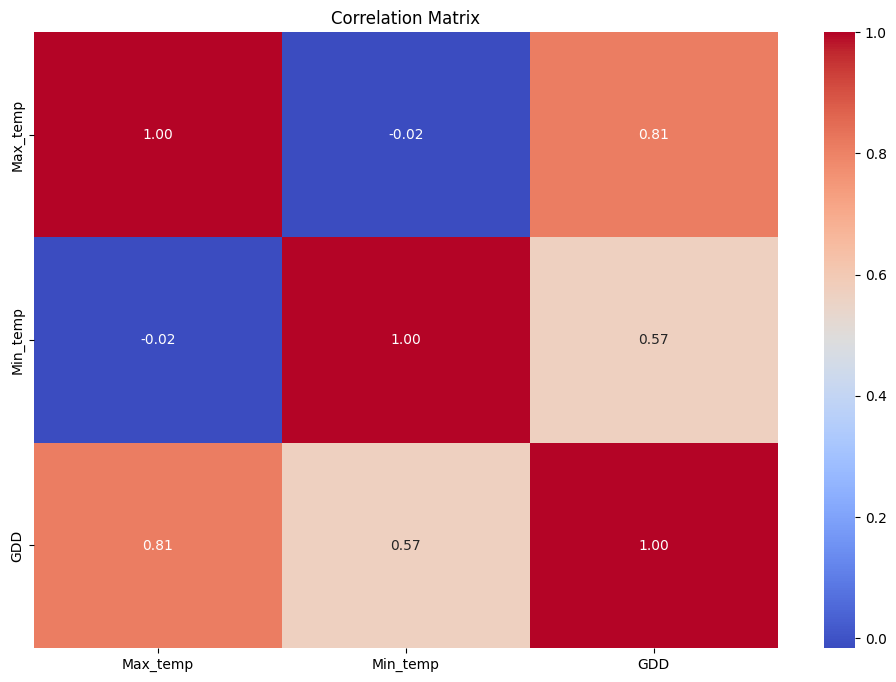

In [53]:
# visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

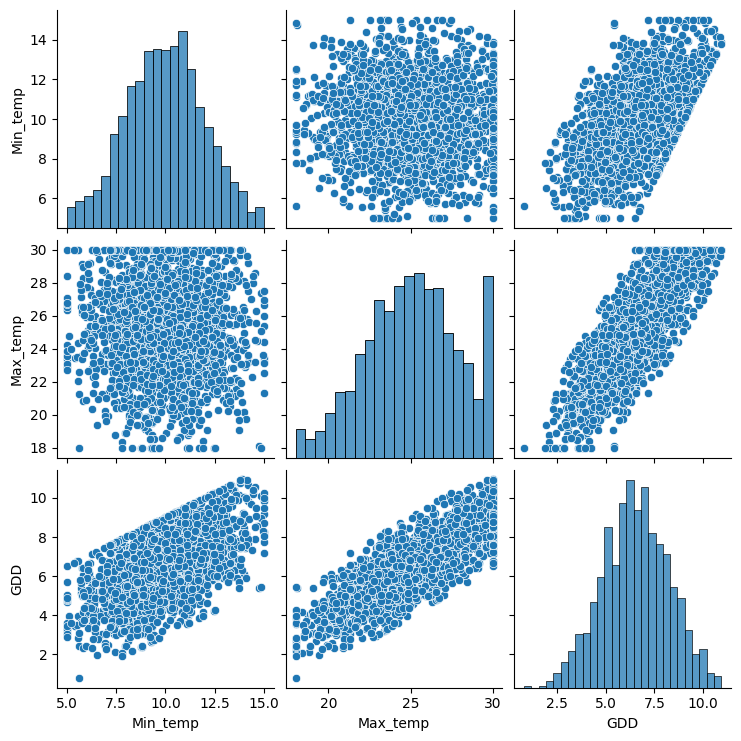

In [54]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, vars=['Min_temp', 'Max_temp', 'GDD'])
plt.show()

### building the Model

In [55]:
# split the dataset on the 80-20 rule
X = df.drop('GDD', axis=1)
y = df['GDD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Train the model on Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [1]:
# Evaluate the model on the test set using Mean Squared Error
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error on the test set:", mse)

NameError: name 'linear_reg_model' is not defined

In [58]:
# plt.scatter(X_train, y_train ,label ='Data', color='blue')
# x = tf.linspace(-20,40,100)
# plt.plot(x, linear_reg_model.predict(np.array(x).reshape(-1,1)), label ='Fit', color='red', linewidth=3)
# plt.legend()
# plt.title('gdd vs max and min temp')
# plt.ylabel('GDD')
# plt.xlabel('Max and Min Temperature_C')
# plt.show()

### Hyper parameter tuning

In [59]:
# Hyperparameter Tuning for Linear Regression (GridSearchCV)
# param_grid = {'normalize': [True, False]}
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_linear_reg_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters for Linear Regression:", best_params)

Best Hyperparameters for Linear Regression: {'fit_intercept': True}


In [60]:
# Normalize the data and retrain the model using the best hyperparameters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [61]:
# Evaluate the model on the scaled test set
y_pred_scaled = best_linear_reg_model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("Mean Squared Error on the scaled test set:", mse_scaled)

Mean Squared Error on the scaled test set: 3.0267606857198697e-30
